In [218]:
import re
import glob
import numpy as np
from collections import Counter
import matplotlib.pyplot as plt
from matplotlib.backends.backend_pdf import PdfPages

In [219]:
REL_DATA_PATH = '../raw_gantt_chart_data/output/'
data_condition_dir = glob.glob(REL_DATA_PATH + '*')
data_condition_dir.sort()

In [220]:
"""
Generates plots of per condition e.g.cpu_2
Show number of instances for each type of the workflow
y-axis number of instances
x-axis workflow type
"""

def generate_agg_condition_wf_dist(data_condition_dir, pdf, colors):
    
    labels = []
    wf     = []
    all_total = []
    width,height   = 6,4
    x   = np.zeros(5)
    fig = plt.figure(figsize = (width + 2,height + 2))

    for data_dir in data_condition_dir:

        condition_type = data_dir.split('/')[-1]
        wf_type_list   = [re.sub(pattern, '', x.split('/')[-1]) for x in glob.glob(data_dir + '/*')]
        wf_counts_long = Counter(wf_type_list)
        wf_counts      = {}
        wf_counts_list = list(wf_counts_long.keys())
        wf_counts_list.sort()
        labels.append(condition_type)
        
        for key in wf_counts_list:
            wf_counts[key.split('_')[0]] = wf_counts_long[key]            
        all_total.append(list(wf_counts.values()))
        plt.bar(wf_counts_list, wf_counts.values(), width=0.8, bottom = x, label = condition_type)
        
        x = x + list(wf_counts.values())
    j = -0.1
    for i in x:
        plt.text(j, i+10, int(i), fontsize=12)
        j = j+1
        
    plt.xticks(rotation=15, fontsize=7)
    plt.title('Distribution of Granular Conditions per Workflow ', fontsize=13)
    plt.xlabel('Workflow Type', fontsize=12)
    plt.ylabel('# of workflow instances', fontsize=12)
    plt.tight_layout(h_pad=3.0)
    plt.legend(labels,loc='right')  
    pdf.savefig(fig)
    plt.close()
        
    fig = plt.figure(figsize = (width+2,height+2))
    plt.bar(wf_counts.keys(), x, color=colors)
    
    j = -0.1
    for i in x:
        plt.text(j, i+10, int(i), fontsize=12)
        j = j+1
          
    plt.xticks(rotation=15, fontsize=7)
    plt.title(' Distribution of Instances per Workflow', fontsize=13)
    plt.xlabel('Workflow Type', fontsize=12)
    plt.ylabel('# of workflow instances', fontsize=12)
    plt.tight_layout(h_pad=3.0)
    pdf.savefig(fig)
    plt.close()
    wf = list(wf_counts.keys())

                
    return all_total, wf, labels, pdf

In [221]:
def generate_condition_wf_dist(data_condition_dir, pdf, colors, pattern):
    
    labels = []
    wf     = []
    all_total = []

    for data_dir in data_condition_dir:

        condition_type = data_dir.split('/')[-1]
        wf_type_list   = [re.sub(pattern, '', x.split('/')[-1]) for x in glob.glob(data_dir + '/*')]
        wf_counts_long = Counter(wf_type_list)
        wf_counts      = {}
        width,height   = 6,4
        wf_counts_list = list(wf_counts_long.keys())
        wf_counts_list.sort()
        labels.append(condition_type)
        
        for key in wf_counts_list:
            wf_counts[key.split('_')[0]] = wf_counts_long[key]            
        all_total.append(list(wf_counts.values()))
        
        fig = plt.figure(figsize = (width,height))
        plt.bar(wf_counts.keys(), wf_counts.values(), color=colors)
        plt.xticks(rotation=15, fontsize=7)
        plt.title(' Granular Condition: {}.'.format(condition_type), fontsize=13)
        plt.xlabel('Workflow', fontsize=12)
        plt.ylabel('# of workflow instances', fontsize=12)
        plt.tight_layout(h_pad=3.0)
        pdf.savefig(fig)
        plt.close()
        wf = list(wf_counts.keys())
                
    return all_total, wf, labels, pdf

In [222]:
"""
Generates a single stacked plot where workflow types
are aggregated per granular condition: 
y-axis number of instances (stacked for all the workflows)
x-axis granual condition type
"""

def generate_single_dist(labels, wf, all_total, pdf):
    
    width,height   = 6,4
    total = np.zeros(len(labels))
    all_total = np.transpose(all_total)    
    fig = plt.figure(figsize = (width+2,height+2))

    for i in range(len(wf)):
        plt.bar(labels, all_total[i], width=0.4,bottom = total, label = labels[i])
        total = total + all_total[i]
        
    j = -0.4
    for i in total:
        plt.text(j, i+10, int(i), fontsize=12)
        j = j+1

    plt.legend(wf)
    plt.xticks(rotation=25, fontsize=10)
    plt.tight_layout(pad=4.0)
    plt.xlabel("Anomaly Type",fontsize=14)
    plt.ylabel("# of examples",fontsize=14)
    plt.title("Distribution of Granular Anomaly Types",fontsize=16)
    pdf.savefig(fig)
    plt.close()
    
    return labels, wf, all_total, pdf

In [223]:
"""
Generates plots for main type of anomaly e.g. CPU
and shows stacked number of instances of each workflow 
for a subtype (cpu_2, cpu_3)
y-axis number of instances (stacked for all the workflows)
x-axis granual condition type for a specific main condition
"""

def generate_main_type_dist(indexes,labels, wf, all_total, pdf):
    
    labels = list(map(labels.__getitem__,indexes))
    main_type_total = all_total[indexes,:]
    agg_type_total = main_type_total.sum(axis=0)

    main_type_total = np.transpose(main_type_total)
    total = np.zeros(len(labels))  
    width,height   = 6,4
    fig = plt.figure(figsize = (width+2,height+2))
    
    for i in range(len(wf)):
        plt.bar(labels, main_type_total[i],width=0.8, bottom = total, label = wf[i])
        total = total + main_type_total[i]

        j = -0.1
        for i in total:
            plt.text(j, i+2, int(i), fontsize=12)
            j = j+1
    plt.legend(wf)
    plt.xticks(rotation=25, fontsize=10)
    plt.tight_layout(pad=4.0)
    plt.xlabel("Granular Anomaly Type",fontsize=14)
    plt.ylabel("# of examples",fontsize=14)
    a_type = labels[0].split('_')[0].upper()
    plt.title("Distribution of {} Anomaly Types".format(a_type),fontsize=16)
    pdf.savefig(fig)
    plt.show()
    plt.close()
    
    return agg_type_total,a_type
    

In [224]:
"""
Generates a plot for main type of anomaly e.g. CPU
and shows stacked number of instances of each workflow 
for a subtype (cpu_2, cpu_3)
y-axis number of instances (stacked for all the workflows)
x-axis main condition type 

"""


def generate_aggregate_single_dist(labels, wf, all_total, pdf):
    
    width,height   = 6,4
    agg_labels = [x.split("_")[0] for x in labels]
    agg_unique_labels = np.unique(agg_labels)
    
    total = np.zeros(len(agg_unique_labels))   
    all_total = np.transpose(all_total)

    agg_types_total = []
    for l in agg_unique_labels:
        indexes    = [x for x,z in enumerate(agg_labels) if z == l]
        type_total = 0

        for i in indexes:
            type_total = type_total + all_total[i]
        agg_types_total.append(type_total)
        generate_main_type_dist(indexes,labels, wf, all_total, pdf)
        
    agg_types_total = np.transpose(agg_types_total)
    fig   = plt.figure(figsize = (width+2,height+2))

    for i in range(len(wf)):
        plt.bar(agg_unique_labels, agg_types_total[i], bottom = total, label = wf[i])
        total = total + agg_types_total[i]

        j = -0.1
        for i in total:
            plt.text(j, i+10, int(i), fontsize=12)
            j = j+1

    plt.legend(wf)
    plt.xticks(rotation=25, fontsize=10)
    plt.tight_layout(pad=4.0)
    plt.xlabel("Main Anomaly Type",fontsize=14)
    plt.ylabel("# of examples",fontsize=14)
    plt.title("Distribution of Main Anomaly Types",fontsize=16)
    pdf.savefig(fig)
    plt.close()

    return labels, wf, all_total, pdf

In [225]:
# regex pattern to find name of the workflow
pattern = r'\-\d{3,}\S+.csv'
#bar plt
colors  = ['red', 'orange', 'blue', 'green', 'purple']
pdfname = 'wf_distributions.pdf'
pdf     = PdfPages(pdfname)

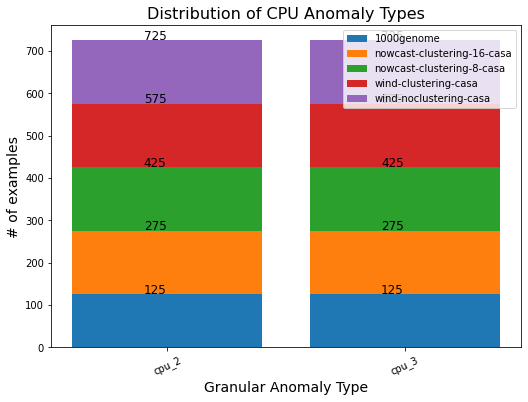

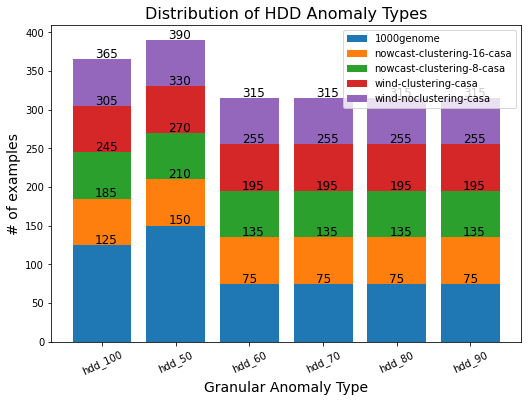

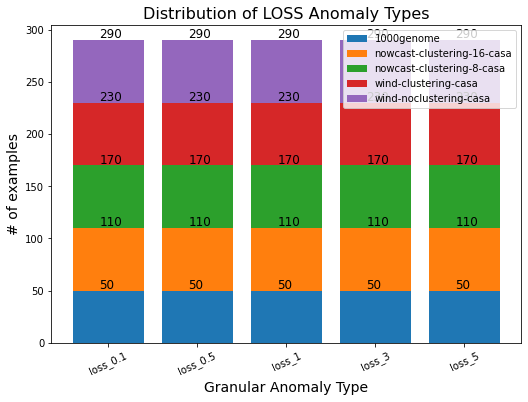

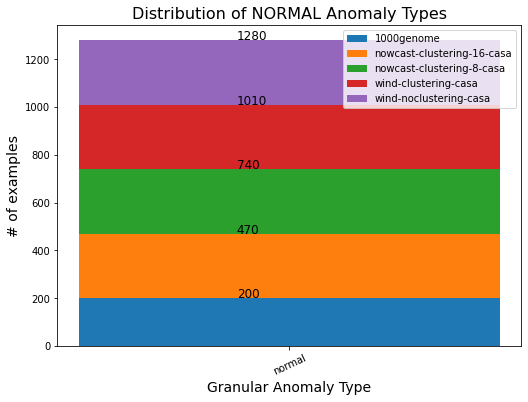

In [226]:
all_total, wf, labels, pdf = generate_agg_condition_wf_dist(data_condition_dir, pdf, colors)
all_total, wf, labels, pdf = generate_condition_wf_dist(data_condition_dir, pdf, colors,pattern)
labels, wf, all_total, pdf = generate_single_dist(labels, wf, all_total, pdf)
labels, wf, all_total, pdf = generate_aggregate_single_dist(labels, wf, all_total, pdf)

pdf.close()